In [150]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os 
#import seaborn as sns
import warnings 
from tqdm.notebook import tqdm 
import pandas as pd 
import gc
%matplotlib inline

In [151]:
BASE_DIR = 'C:\\Users\\User\\Desktop\\Szkoła\\MachineLearning\\AgeRecognition'

In [152]:
train_labels = []
train_paths = []

train_filenames = os.listdir(os.path.join(BASE_DIR, "Train"))
random.shuffle(train_filenames)

train_filenames = train_filenames
train_filenames[0]

'80_0_2_20170112215149951.jpg.chip.jpg'

In [153]:
val_labels = []
val_paths = []

val_filenames = os.listdir(os.path.join(BASE_DIR, "Val"))
random.shuffle(val_filenames)

val_filenames = val_filenames
val_filenames[0]

'51_0_2_20170116192859594.jpg.chip.jpg'

In [154]:
test_labels = []
test_paths = []

test_filenames = os.listdir(os.path.join(BASE_DIR, "Test"))
random.shuffle(test_filenames)

test_filenames = test_filenames
test_filenames[0]

'85_0_0_20170111210445676.jpg.chip.jpg'

In [155]:
def get_paths_and_labels(image_filenames, age_labels, image_paths, folder):
    for image in tqdm(image_filenames):
        image_path = os.path.join(BASE_DIR, folder, image)
        img_components = image.split('_')
    
        if img_components[0] == '.ipynb':
            continue
        age_label = int(img_components[0])
        
        # Append the image_path, age_label, and gender_label
        age_labels.append(age_label)
        image_paths.append(image_path)

In [156]:
get_paths_and_labels(train_filenames, train_labels, train_paths, "Train")
get_paths_and_labels(val_filenames, val_labels, val_paths, "Val")
get_paths_and_labels(test_filenames, test_labels, test_paths, "Test")

  0%|          | 0/7380 [00:00<?, ?it/s]

  0%|          | 0/1583 [00:00<?, ?it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

In [157]:
print(f'Number of age_labels: {len(train_labels)}, Number of image_paths: {len(train_paths)}')

Number of age_labels: 7380, Number of image_paths: 7380


In [158]:
train_df = pd.DataFrame()
train_df['image_path'], train_df['age'] = train_paths, train_labels
train_df.head(5)

,image_path,age
0,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,80
1,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,53
2,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,70
3,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,75
4,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,43


In [159]:
val_df = pd.DataFrame()
val_df['image_path'], val_df['age'] = val_paths, val_labels
val_df.head(5)

,image_path,age
0,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,51
1,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,17
2,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,72
3,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,47
4,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,56


In [160]:
test_df = pd.DataFrame()
test_df['image_path'], test_df['age'] = test_paths, test_labels
test_df.head(5)

,image_path,age
0,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,85
1,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,18
2,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,19
3,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,47
4,C:\Users\User\Desktop\Szkoła\MachineLearning\A...,65


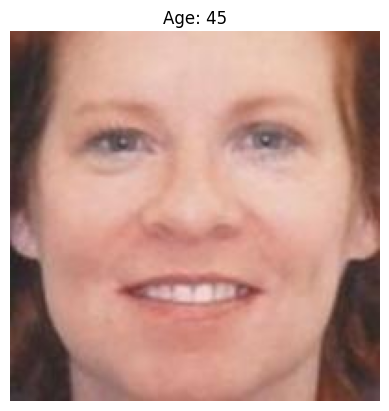

In [161]:
from PIL import Image

rand_index = random.randint(0, len(val_paths))
age = val_df['age'][rand_index]
IMG = Image.open(val_df['image_path'][rand_index])
plt.title(f'Age: {age}')
plt.axis('off')
plt.imshow(IMG)

In [162]:
del train_paths, train_labels, val_paths, val_labels, test_paths, test_labels
gc.collect()

41499

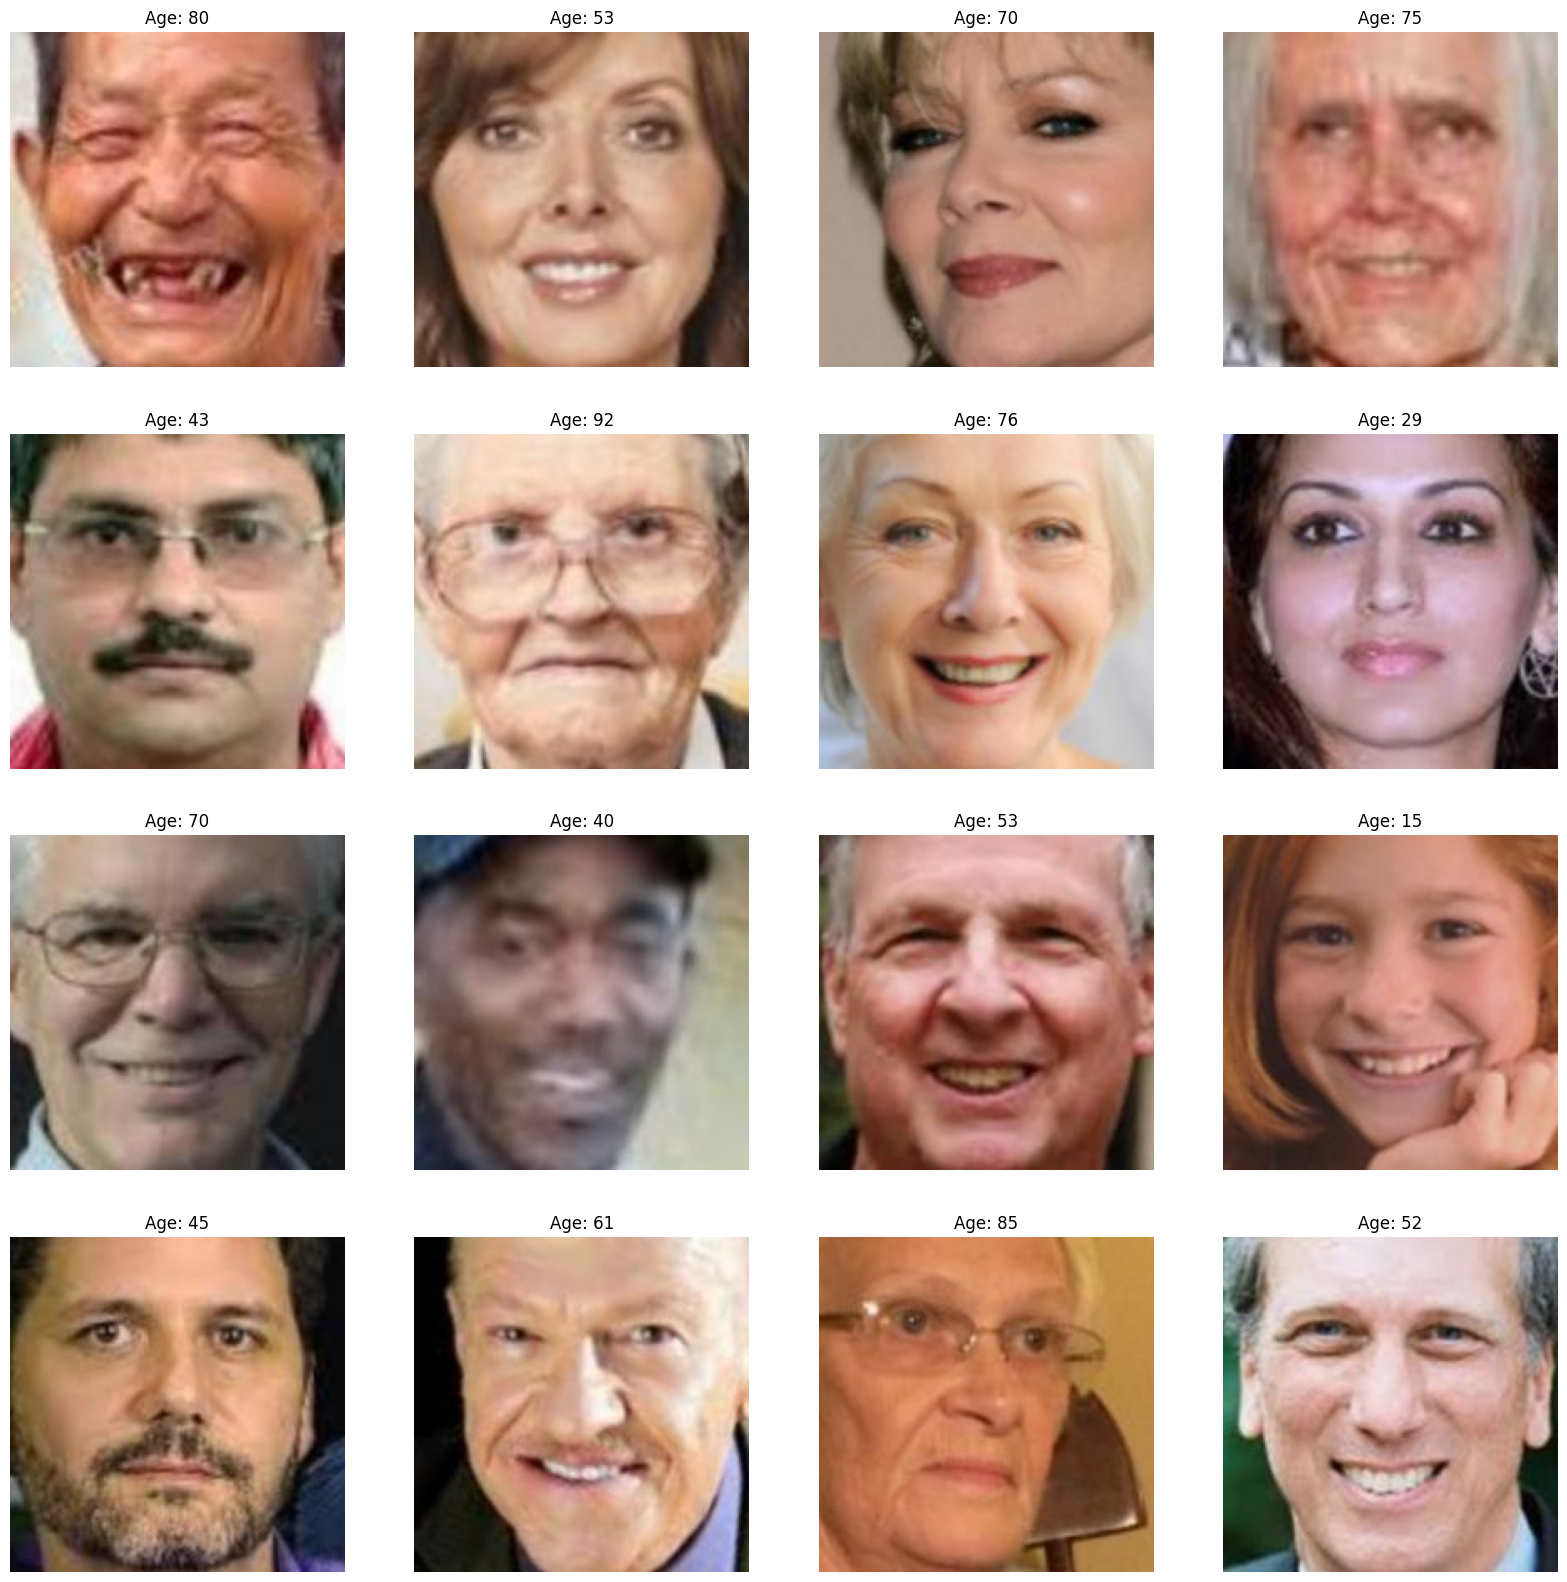

In [163]:
plt.figure(figsize=(20, 20))
samples = train_df.iloc[0:16]

for index, sample, age in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age}')
    plt.imshow(img)

In [164]:
input_width = 180
input_height = 180

In [165]:
def extract_image_features(images, width, height):
    features = list()

    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((width, height), Image.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features, dtype='uint8')
    features = features.reshape(len(features), width, height, 3)
    return features

In [140]:
def extract_image_features(images, width, height):
    features = list()

    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((width, height), Image.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features, dtype='uint8')
    features = features.reshape(len(features), width, height, 3)
    return features

In [24]:
X_train = extract_image_features(train_df['image_path'], input_width, input_height)
X_val = extract_image_features(val_df['image_path'], input_width, input_height)
X_test = extract_image_features(test_df['image_path'], input_width, input_height)

  0%|          | 0/7380 [00:00<?, ?it/s]

  0%|          | 0/1583 [00:00<?, ?it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

In [25]:
y_age_train = np.array(train_df['age'])
y_age_val = np.array(val_df['age'])
y_age_test = np.array(test_df['age'])

In [26]:
del train_df, val_df, test_df
gc.collect()

37731

In [27]:
X_train.shape

(7380, 180, 180, 3)

In [28]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [32]:
input_shape = (input_width, input_height, 3)

In [33]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

dense = Dense(256, activation='relu')(flatten)
dropout = Dropout(0.3)(dense)

output = Dense(1, activation='relu', name='age_out')(dropout)

model = Model(inputs=[inputs], outputs=[output])

model.compile(loss='mae',
              optimizer='adam', metrics=['accuracy'])

# mlflow.log_metric("test_rmse", 10) # error
# mlflow.sklearn.log_model(model, "models")

In [34]:
model = load_model('AgeRecognitionModel_v3.keras')

In [34]:
history = model.fit(x=X_train, y=y_age_train,
                    batch_size=32, epochs=10, validation_data=(X_val, y_age_val))

Epoch 1/10
231/231 [==============================] - 156s 670ms/step - loss: 21.9686 - accuracy: 0.0425 - val_loss: 19.9399 - val_accuracy: 0.0480
Epoch 2/10
231/231 [==============================] - 150s 651ms/step - loss: 16.9879 - accuracy: 0.0397 - val_loss: 14.2525 - val_accuracy: 0.0335
Epoch 3/10
231/231 [==============================] - 149s 644ms/step - loss: 13.8784 - accuracy: 0.0268 - val_loss: 13.9892 - val_accuracy: 0.0164
Epoch 4/10
231/231 [==============================] - 144s 623ms/step - loss: 12.5321 - accuracy: 0.0175 - val_loss: 10.8792 - val_accuracy: 0.0158
Epoch 5/10
231/231 [==============================] - 144s 623ms/step - loss: 11.4019 - accuracy: 0.0157 - val_loss: 9.9952 - val_accuracy: 0.0164
Epoch 6/10
231/231 [==============================] - 144s 625ms/step - loss: 10.7362 - accuracy: 0.0099 - val_loss: 9.4936 - val_accuracy: 0.0126
Epoch 7/10
231/231 [==============================] - 144s 625ms/step - loss: 10.1022 - accuracy: 0.0126 - val_los

In [35]:
from tensorflow.keras.models import load_model
model.save('AgeRecognitionModel_v88.keras')

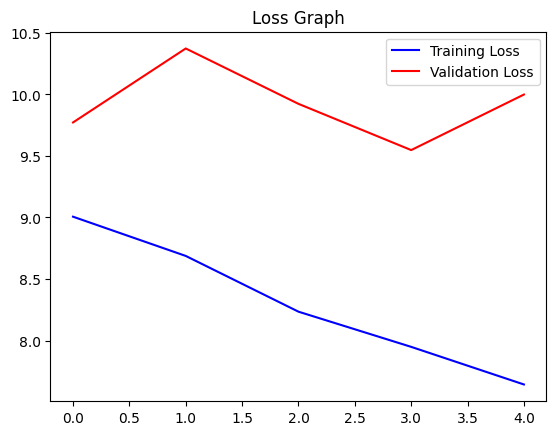

In [37]:
# plot results for age
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [38]:
def get_image_features(image, width, height):
  img = load_img(image)
  img = img.resize((width, height), Image.LANCZOS)
  img = np.array(img)
  img = img.reshape(1, width, height, 3)
  img = img / 255.0
  return img

1/1 [==============================] - 0s 90ms/step


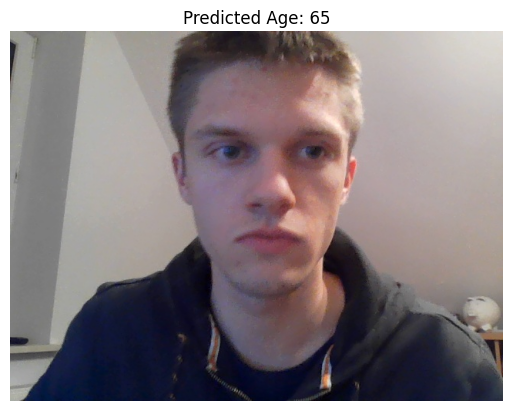

In [39]:
img_to_test = 'FaceRecognition/CamData/data/test/images/00bf6f4c-7fdd-11ee-9103-ec773ba9cb5a.jpg'
features = get_image_features(img_to_test, input_width, input_height)
pred = model.predict(features)
age = round(pred[0][0])

plt.title(f'Predicted Age: {age}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

## ANOTHER MODEL (different edge detection)


In [83]:
input_width = 200
input_height = 200

In [113]:
import cv2
import numpy as np
from keras.preprocessing import image

def canny_edge_detection(image):
    # Konwersja obrazu na skale szarości
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Zastosowanie detekcji krawędzi Canny
    edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)
    
    return edges

def extract_image_features(images, width, height):
    features = list()

    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((width, height), Image.LANCZOS)
        img = np.array(img)
        
        # Stosowanie detekcji krawędzi Canny
        img = canny_edge_detection(img)
        
        # Przekształcanie obrazu na skale szarości
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        
        features.append(img)

    features = np.array(features, dtype='uint8')
    features = features.reshape(len(features), width, height, 3)
    return features

In [85]:
X_train = extract_image_features(train_df['image_path'], input_width, input_height)
X_val = extract_image_features(val_df['image_path'], input_width, input_height)
X_test = extract_image_features(test_df['image_path'], input_width, input_height)

  0%|          | 0/7380 [00:00<?, ?it/s]

  0%|          | 0/1583 [00:00<?, ?it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

In [86]:
y_age_train = np.array(train_df['age'])
y_age_val = np.array(val_df['age'])
y_age_test = np.array(test_df['age'])

In [87]:
del train_df, val_df, test_df
gc.collect()

37687

In [88]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [89]:
input_shape = (input_width, input_height, 3)

In [ ]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

dense = Dense(256, activation='relu')(flatten)
dropout = Dropout(0.3)(dense)

output = Dense(1, activation='relu', name='age_out')(dropout)

model = Model(inputs=[inputs], outputs=[output])

model.compile(loss='mae',
              optimizer='adam', metrics=['accuracy'])

# mlflow.log_metric("test_rmse", 10) # error
# mlflow.sklearn.log_model(model, "models")

In [91]:
history = model.fit(x=X_train, y=y_age_train,
                    batch_size=32, epochs=10, validation_data=(X_val, y_age_val))

Epoch 1/10
231/231 [==============================] - 194s 827ms/step - loss: 16.6141 - accuracy: 0.0404 - val_loss: 14.3439 - val_accuracy: 0.0480
Epoch 2/10
231/231 [==============================] - 183s 791ms/step - loss: 13.0555 - accuracy: 0.0308 - val_loss: 11.7810 - val_accuracy: 0.0379
Epoch 3/10
231/231 [==============================] - 181s 785ms/step - loss: 11.9670 - accuracy: 0.0263 - val_loss: 12.2795 - val_accuracy: 0.0297
Epoch 4/10
231/231 [==============================] - 182s 790ms/step - loss: 10.9125 - accuracy: 0.0221 - val_loss: 10.9641 - val_accuracy: 0.0253
Epoch 5/10
231/231 [==============================] - 181s 785ms/step - loss: 10.0724 - accuracy: 0.0218 - val_loss: 10.5454 - val_accuracy: 0.0158
Epoch 6/10
231/231 [==============================] - 181s 784ms/step - loss: 9.3872 - accuracy: 0.0213 - val_loss: 10.1734 - val_accuracy: 0.0177
Epoch 7/10
231/231 [==============================] - 183s 791ms/step - loss: 8.7499 - accuracy: 0.0199 - val_los

In [92]:
from tensorflow.keras.models import load_model
model.save('AgeRecognitionModel_v111.keras')

## another model

In [167]:
input_width = 180
input_height = 180

In [142]:
import cv2
import numpy as np
from keras.preprocessing import image

def canny_edge_detection(image):
    # Konwersja obrazu na skale szarości
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Zastosowanie detekcji krawędzi Canny
    edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)
    
    return edges

def extract_image_features(images, width, height):
    features = list()

    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((width, height), Image.LANCZOS)
        img = np.array(img)
        
        # Stosowanie detekcji krawędzi Canny
        img = canny_edge_detection(img)
        
        # Przekształcanie obrazu na skale szarości
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        
        features.append(img)

    features = np.array(features, dtype='uint8')
    features = features.reshape(len(features), width, height, 3)
    return features

In [168]:
X_train = extract_image_features(train_df['image_path'], input_width, input_height)
X_val = extract_image_features(val_df['image_path'], input_width, input_height)
X_test = extract_image_features(test_df['image_path'], input_width, input_height)

  0%|          | 0/7380 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [144]:
y_age_train = np.array(train_df['age'])
y_age_val = np.array(val_df['age'])
y_age_test = np.array(test_df['age'])

In [145]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [146]:
input_shape = (input_width, input_height, 3)

In [147]:
inputs = Input((input_shape))
conv_1 = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_1 = Conv2D(16, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

dense = Dense(512, activation='relu')(flatten)
dropout = Dropout(0.5)(dense)

dense = Dense(256, activation='relu')(flatten)
dropout = Dropout(0.3)(dense)

output = Dense(1, activation='relu', name='age_out')(dropout)

model = Model(inputs=[inputs], outputs=[output])

model.compile(loss='mae',
              optimizer='adam', metrics=['accuracy'])

# mlflow.log_metric("test_rmse", 10) # error
# mlflow.sklearn.log_model(model, "models")

In [148]:
history = model.fit(x=X_train, y=y_age_train,
                    batch_size=32, epochs=10, validation_data=(X_val, y_age_val))

Epoch 1/10
231/231 [==============================] - 150s 640ms/step - loss: 18.3213 - accuracy: 0.0415 - val_loss: 13.4666 - val_accuracy: 0.0480
Epoch 2/10
231/231 [==============================] - 150s 648ms/step - loss: 13.6816 - accuracy: 0.0378 - val_loss: 12.1059 - val_accuracy: 0.0442
Epoch 3/10
231/231 [==============================] - 147s 638ms/step - loss: 12.5597 - accuracy: 0.0316 - val_loss: 11.0822 - val_accuracy: 0.0347
Epoch 4/10
231/231 [==============================] - 144s 625ms/step - loss: 11.1852 - accuracy: 0.0248 - val_loss: 10.5279 - val_accuracy: 0.0152
Epoch 5/10
231/231 [==============================] - 144s 624ms/step - loss: 10.4696 - accuracy: 0.0228 - val_loss: 11.0003 - val_accuracy: 0.0164
Epoch 6/10
231/231 [==============================] - 143s 619ms/step - loss: 9.8296 - accuracy: 0.0207 - val_loss: 9.6776 - val_accuracy: 0.0215
Epoch 7/10
231/231 [==============================] - 144s 622ms/step - loss: 9.3486 - accuracy: 0.0195 - val_loss

## another model

In [169]:
def extract_image_features(images, width, height):
    features = list()

    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((width, height), Image.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features, dtype='uint8')
    features = features.reshape(len(features), width, height, 3)
    return features

In [170]:
X_train = extract_image_features(train_df['image_path'], input_width, input_height)
X_val = extract_image_features(val_df['image_path'], input_width, input_height)
X_test = extract_image_features(test_df['image_path'], input_width, input_height)

  0%|          | 0/7380 [00:00<?, ?it/s]

  0%|          | 0/1583 [00:00<?, ?it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

In [171]:
y_age_train = np.array(train_df['age'])
y_age_val = np.array(val_df['age'])
y_age_test = np.array(test_df['age'])

In [172]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [173]:
input_shape = (input_width, input_height, 3)

In [180]:
print(input_shape)

(180, 180, 3)


In [174]:
inputs = Input((input_shape))
conv_1 = Conv2D(8, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_1 = Conv2D(16, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

dense = Dense(512, activation='relu')(flatten)
dropout = Dropout(0.5)(dense)

dense = Dense(256, activation='relu')(flatten)
dropout = Dropout(0.3)(dense)

output = Dense(1, activation='relu', name='age_out')(dropout)

model = Model(inputs=[inputs], outputs=[output])

model.compile(loss='mae',
              optimizer='adam', metrics=['accuracy'])

# mlflow.log_metric("test_rmse", 10) # error
# mlflow.sklearn.log_model(model, "models")

In [175]:
history = model.fit(x=X_train, y=y_age_train,
                    batch_size=32, epochs=10, validation_data=(X_val, y_age_val))

Epoch 1/10
231/231 [==============================] - 233s 1s/step - loss: 21.0861 - accuracy: 0.0421 - val_loss: 17.0711 - val_accuracy: 0.0480
Epoch 2/10
231/231 [==============================] - 177s 766ms/step - loss: 16.3955 - accuracy: 0.0419 - val_loss: 14.0897 - val_accuracy: 0.0411
Epoch 3/10
231/231 [==============================] - 155s 627ms/step - loss: 13.7345 - accuracy: 0.0343 - val_loss: 12.3803 - val_accuracy: 0.0310
Epoch 4/10
231/231 [==============================] - 157s 682ms/step - loss: 12.3666 - accuracy: 0.0232 - val_loss: 10.2689 - val_accuracy: 0.0120
Epoch 5/10
231/231 [==============================] - 144s 625ms/step - loss: 11.3734 - accuracy: 0.0153 - val_loss: 10.5792 - val_accuracy: 0.0190
Epoch 6/10
231/231 [==============================] - 147s 635ms/step - loss: 10.7518 - accuracy: 0.0122 - val_loss: 10.0376 - val_accuracy: 0.0107
Epoch 7/10
231/231 [==============================] - 144s 625ms/step - loss: 10.2119 - accuracy: 0.0107 - val_loss

In [176]:
model.save('AgeRecognitionModel_v222.keras')

In [177]:
history = model.fit(x=X_train, y=y_age_train,
                    batch_size=32, epochs=2, validation_data=(X_val, y_age_val))

Epoch 1/2
231/231 [==============================] - 379s 2s/step - loss: 8.4477 - accuracy: 0.0065 - val_loss: 8.3754 - val_accuracy: 0.0057
Epoch 2/2
231/231 [==============================] - 160s 694ms/step - loss: 8.1257 - accuracy: 0.0076 - val_loss: 8.2074 - val_accuracy: 0.0095


In [178]:
history = model.fit(x=X_train, y=y_age_train,
                    batch_size=32, epochs=4, validation_data=(X_val, y_age_val))

MemoryError: Unable to allocate 2.67 GiB for an array with shape (7380, 180, 180, 3) and data type float32

In [ ]:
history = model.fit(x=X_train, y=y_age_train,
                    batch_size=32, epochs=10, validation_data=(X_val, y_age_val))

In [179]:
model.save('AgeRecognitionModel_v222.keras')